# Predict Loan Eligibility for Dream Housing Finance company

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Train dataset (EDA & Pre-Processing)

In [2]:
# Load the train dataset

train_data = pd.read_csv(r"C:\Users\sravi\Downloads\ICTAK\Virtual competion 2\train_ctrUa4K.csv")
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Basic information about data

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
# Statistical information about data

train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
# Finding null values

train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# Handiling the null values

train_data['Gender'].fillna(train_data['Gender'].mode()[0],inplace=True)
train_data['Married'].fillna(train_data['Married'].mode()[0],inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0],inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0],inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0],inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0],inplace=True)
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(),inplace=True)

In [7]:
train_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

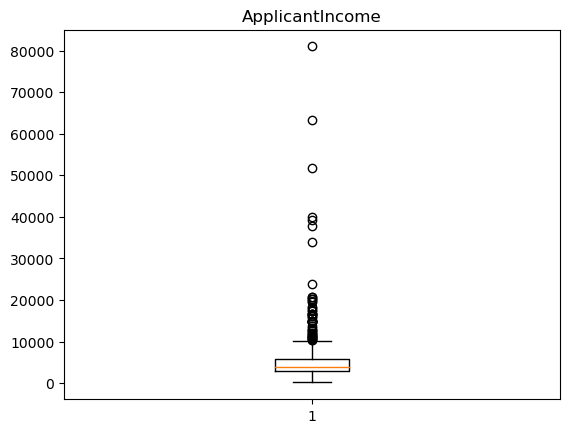

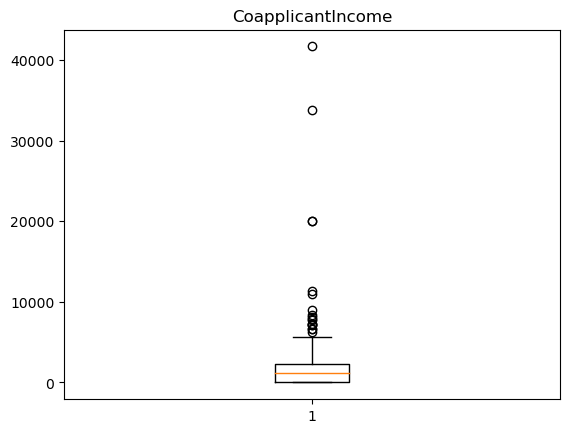

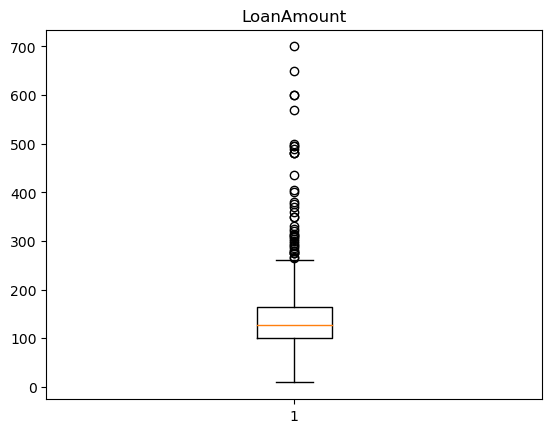

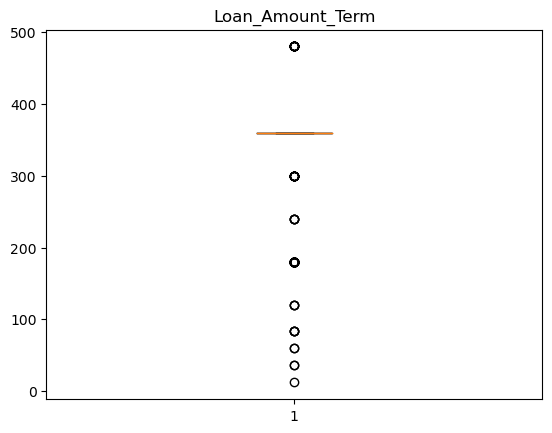

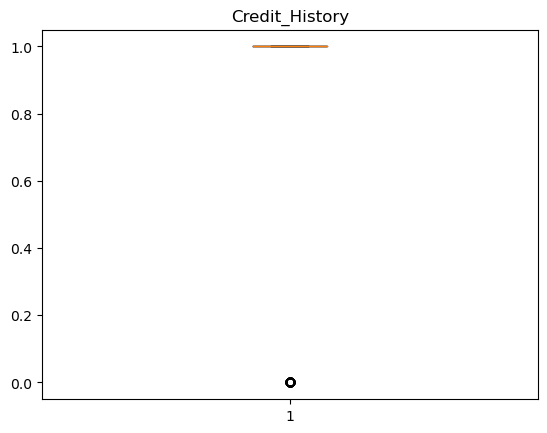

In [8]:
# Checking outliers

columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

for i in columns:
    plt.figure()
    plt.boxplot(train_data[i])
    plt.title(i)

In [9]:
# Handling Outliers

Q1=np.percentile(train_data['ApplicantIncome'],25,method='midpoint')
Q2=np.percentile(train_data['ApplicantIncome'],50,method='midpoint')
Q3=np.percentile(train_data['ApplicantIncome'],75,method='midpoint')

IQR=Q3-Q1

low_lim = Q1 -1.5*IQR
up_lim = Q3+1.5*IQR

train_data['ApplicantIncome'] = train_data['ApplicantIncome'].clip(lower=low_lim,upper=up_lim)

outliers=[]

for x in train_data['ApplicantIncome']:
    if((x<low_lim) or (x>up_lim)):
        outliers.append(x)
        
print(outliers)        
        

[]


In [10]:
Q1=np.percentile(train_data['CoapplicantIncome'],25,method='midpoint')
Q2=np.percentile(train_data['CoapplicantIncome'],50,method='midpoint')
Q3=np.percentile(train_data['CoapplicantIncome'],75,method='midpoint')

IQR=Q3-Q1

low_lim = Q1 -1.5*IQR
up_lim = Q3+1.5*IQR

train_data['CoapplicantIncome'] = train_data['CoapplicantIncome'].clip(lower=low_lim,upper=up_lim)

outliers=[]

for x in train_data['CoapplicantIncome']:
    if((x<low_lim) or (x>up_lim)):
        outliers.append(x)
        
print(outliers)        

[]


In [11]:
Q1=np.percentile(train_data['LoanAmount'],25,method='midpoint')
Q2=np.percentile(train_data['LoanAmount'],50,method='midpoint')
Q3=np.percentile(train_data['LoanAmount'],75,method='midpoint')

IQR=Q3-Q1

low_lim = Q1 -1.5*IQR
up_lim = Q3+1.5*IQR

train_data['LoanAmount'] = train_data['LoanAmount'].clip(lower=low_lim,upper=up_lim)

outliers=[]

for x in train_data['LoanAmount']:
    if((x<low_lim) or (x>up_lim)):
        outliers.append(x)
        
print(outliers)        

[]


In [12]:
Q1=np.percentile(train_data['Loan_Amount_Term'],25,method='midpoint')
Q2=np.percentile(train_data['Loan_Amount_Term'],50,method='midpoint')
Q3=np.percentile(train_data['Loan_Amount_Term'],75,method='midpoint')

IQR=Q3-Q1

low_lim = Q1 -1.5*IQR
up_lim = Q3+1.5*IQR

train_data['Loan_Amount_Term'] = train_data['Loan_Amount_Term'].clip(lower=low_lim,upper=up_lim)

outliers=[]

for x in train_data['Loan_Amount_Term']:
    if((x<low_lim) or (x>up_lim)):
        outliers.append(x)
        
print(outliers)        

[]


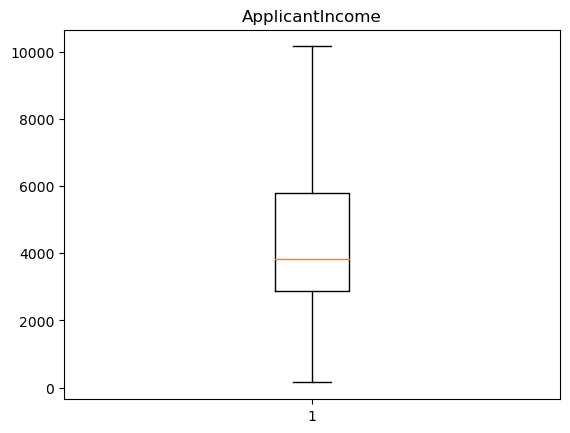

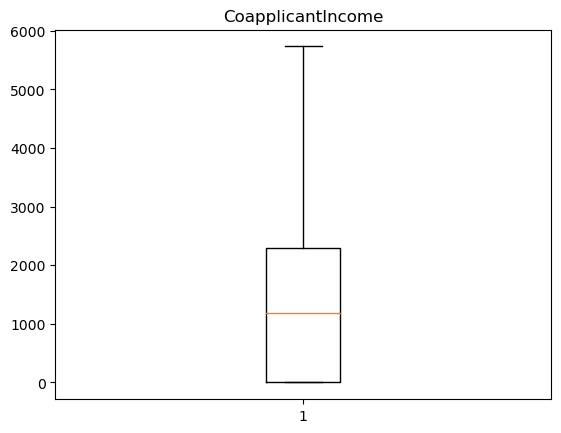

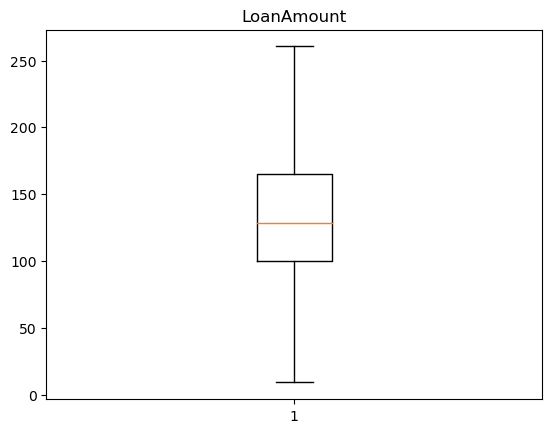

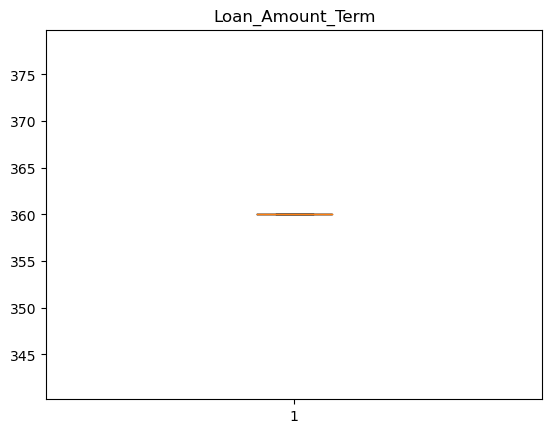

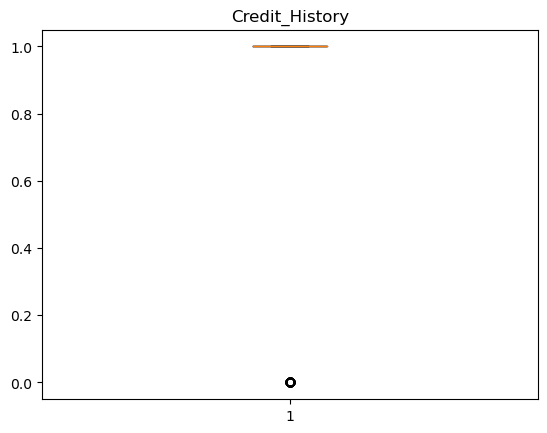

In [13]:
columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

for i in columns:
    plt.figure()
    plt.boxplot(train_data[i])
    plt.title(i)

In [14]:
# Encoding the data

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
train_data['Gender']=encoder.fit_transform(train_data['Gender'])
train_data['Married']=encoder.fit_transform(train_data['Married'])
train_data['Education']=encoder.fit_transform(train_data['Education'])
train_data['Self_Employed']=encoder.fit_transform(train_data['Self_Employed'])
train_data['Property_Area']=encoder.fit_transform(train_data['Property_Area'])
train_data['Loan_Status']=encoder.fit_transform(train_data['Loan_Status'])
train_data['Loan_ID']=encoder.fit_transform(train_data['Loan_ID'])
train_data['Dependents']=encoder.fit_transform(train_data['Dependents'])
train_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849.0,0.00,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583.0,1508.00,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000.0,0.00,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583.0,2358.00,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000.0,0.00,141.0,360.0,1.0,2,1
5,5,1,1,2,0,1,5417.0,4196.00,260.5,360.0,1.0,2,1
6,6,1,1,0,1,0,2333.0,1516.00,95.0,360.0,1.0,2,1
7,7,1,1,3,0,0,3036.0,2504.00,158.0,360.0,0.0,1,0
8,8,1,1,2,0,0,4006.0,1526.00,168.0,360.0,1.0,2,1
9,9,1,1,1,0,0,10156.5,5731.25,260.5,360.0,1.0,1,0


<Axes: >

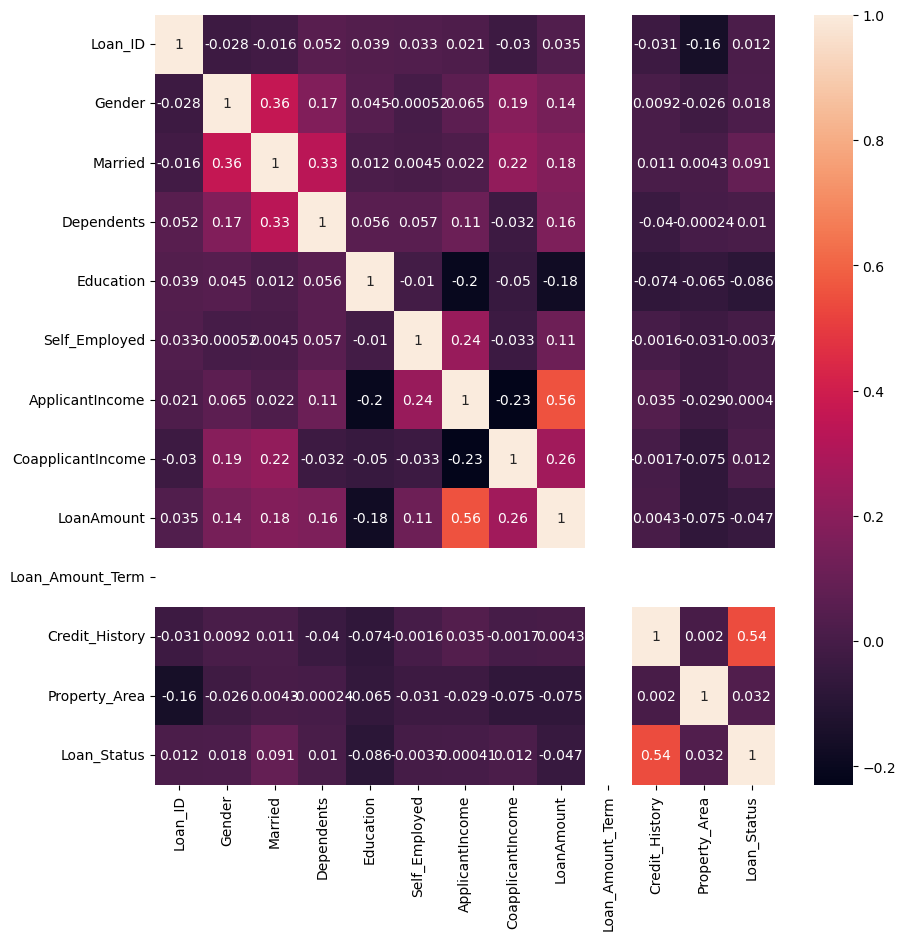

In [15]:
# Correlation of dataset

cormat=train_data.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(cormat,annot=True)

In [16]:
# Feature Extraction

x=train_data.drop(columns=['Loan_ID','Loan_Status'])
y_train=train_data['Loan_Status'].values
x_train=x.values

In [17]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)

# Test dataset (EDA & Pre-Processing)

In [18]:
# Load the test dataset

test_data = pd.read_csv(r"C:\Users\sravi\Downloads\ICTAK\Virtual competion 2\test_lAUu6dG.csv")
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [19]:
# Basic information about data

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [20]:
# Statistical information about data

test_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [21]:
# Finding null values

test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [22]:
# Handiling the null values

test_data['Gender'].fillna(test_data['Gender'].mode()[0],inplace=True)
test_data['Dependents'].fillna(test_data['Dependents'].mode()[0],inplace=True)
test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0],inplace=True)
test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0],inplace=True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0],inplace=True)
test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(),inplace=True)

In [23]:
test_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

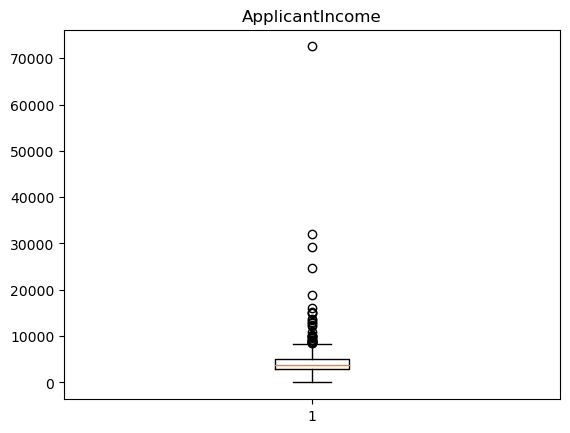

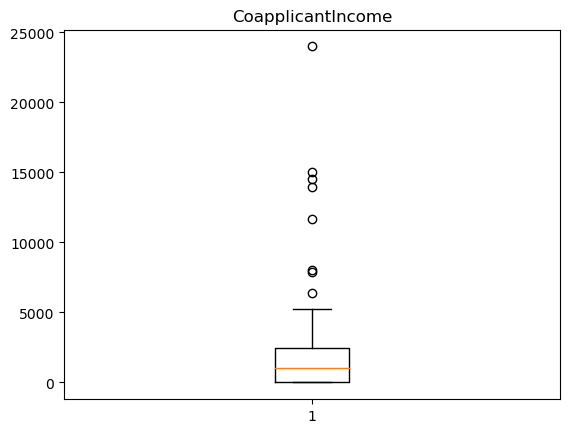

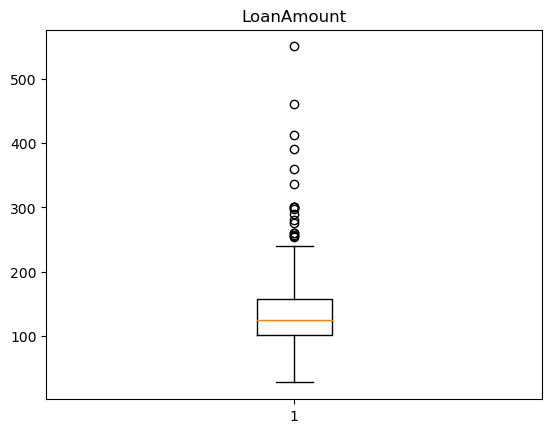

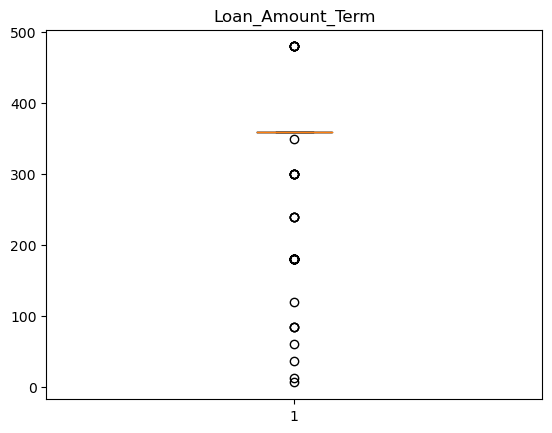

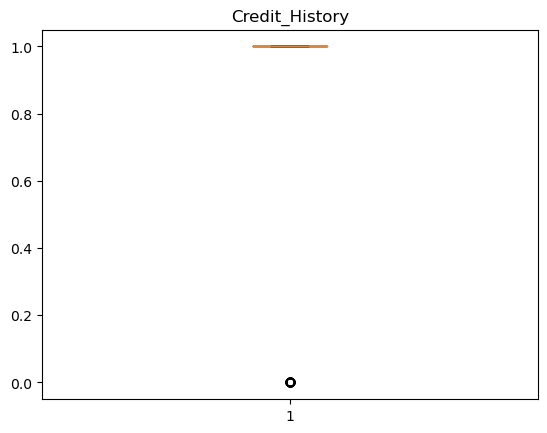

In [24]:
# Checking outliers

columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

for i in columns:
    plt.figure()
    plt.boxplot(test_data[i])
    plt.title(i)

In [25]:
# Handling Outliers

Q1=np.percentile(test_data['ApplicantIncome'],25,method='midpoint')
Q2=np.percentile(test_data['ApplicantIncome'],50,method='midpoint')
Q3=np.percentile(test_data['ApplicantIncome'],75,method='midpoint')

IQR=Q3-Q1

low_lim = Q1 -1.5*IQR
up_lim = Q3+1.5*IQR

test_data['ApplicantIncome'] = test_data['ApplicantIncome'].clip(lower=low_lim,upper=up_lim)

outliers=[]

for x in test_data['ApplicantIncome']:
    if((x<low_lim) or (x>up_lim)):
        outliers.append(x)
        
print(outliers)        
        

[]


In [26]:
Q1=np.percentile(test_data['CoapplicantIncome'],25,method='midpoint')
Q2=np.percentile(test_data['CoapplicantIncome'],50,method='midpoint')
Q3=np.percentile(test_data['CoapplicantIncome'],75,method='midpoint')

IQR=Q3-Q1

low_lim = Q1 -1.5*IQR
up_lim = Q3+1.5*IQR

test_data['CoapplicantIncome'] = test_data['CoapplicantIncome'].clip(lower=low_lim,upper=up_lim)

outliers=[]

for x in test_data['CoapplicantIncome']:
    if((x<low_lim) or (x>up_lim)):
        outliers.append(x)
        
print(outliers)        

[]


In [27]:
Q1=np.percentile(test_data['LoanAmount'],25,method='midpoint')
Q2=np.percentile(test_data['LoanAmount'],50,method='midpoint')
Q3=np.percentile(test_data['LoanAmount'],75,method='midpoint')

IQR=Q3-Q1

low_lim = Q1 -1.5*IQR
up_lim = Q3+1.5*IQR

test_data['LoanAmount'] = test_data['LoanAmount'].clip(lower=low_lim,upper=up_lim)

outliers=[]

for x in test_data['LoanAmount']:
    if((x<low_lim) or (x>up_lim)):
        outliers.append(x)
        
print(outliers)        

[]


In [28]:
Q1=np.percentile(test_data['Loan_Amount_Term'],25,method='midpoint')
Q2=np.percentile(test_data['Loan_Amount_Term'],50,method='midpoint')
Q3=np.percentile(test_data['Loan_Amount_Term'],75,method='midpoint')

IQR=Q3-Q1

low_lim = Q1 -1.5*IQR
up_lim = Q3+1.5*IQR

test_data['Loan_Amount_Term'] = test_data['Loan_Amount_Term'].clip(lower=low_lim,upper=up_lim)

outliers=[]

for x in test_data['Loan_Amount_Term']:
    if((x<low_lim) or (x>up_lim)):
        outliers.append(x)
        
print(outliers)        

[]


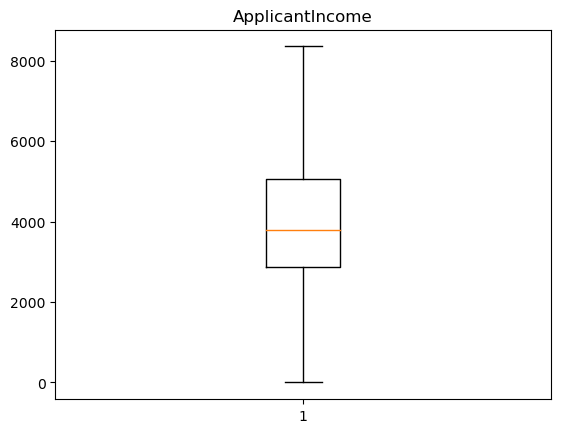

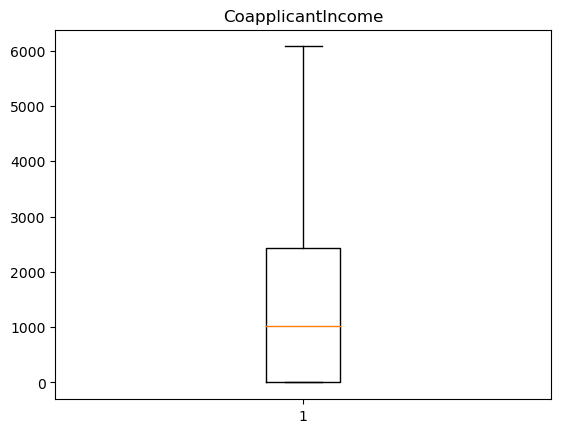

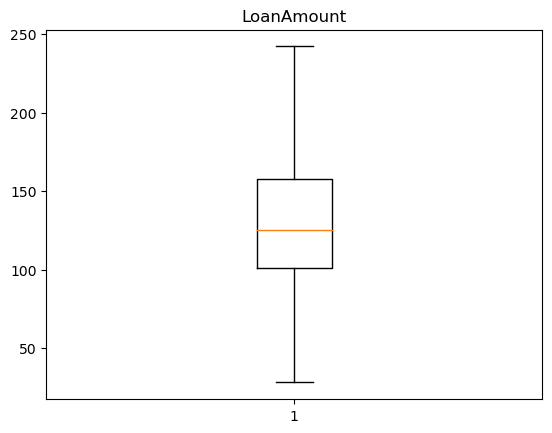

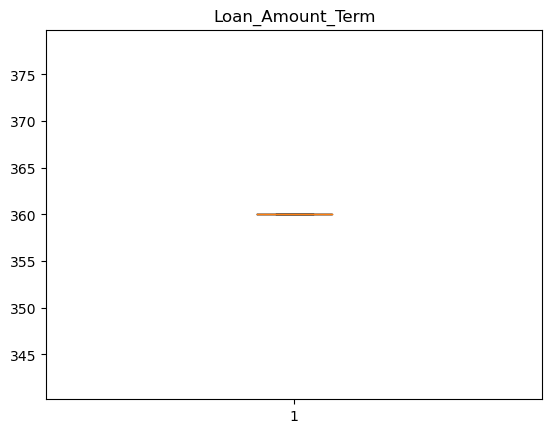

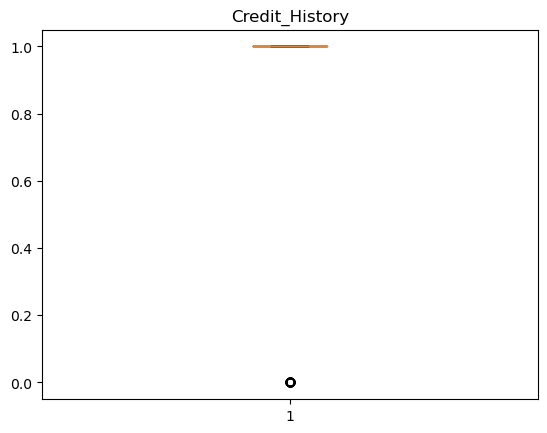

In [29]:
columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

for i in columns:
    plt.figure()
    plt.boxplot(test_data[i])
    plt.title(i)

In [30]:
# Encoding the data

test_data['Gender']=encoder.fit_transform(test_data['Gender'])
test_data['Married']=encoder.fit_transform(test_data['Married'])
test_data['Education']=encoder.fit_transform(test_data['Education'])
test_data['Self_Employed']=encoder.fit_transform(test_data['Self_Employed'])
test_data['Property_Area']=encoder.fit_transform(test_data['Property_Area'])
test_data['Loan_ID']=encoder.fit_transform(test_data['Loan_ID'])
test_data['Dependents']=encoder.fit_transform(test_data['Dependents'])
test_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,5720,0.0,110.00,360.0,1.0,2
1,1,1,1,1,0,0,3076,1500.0,126.00,360.0,1.0,2
2,2,1,1,2,0,0,5000,1800.0,208.00,360.0,1.0,2
3,3,1,1,2,0,0,2340,2546.0,100.00,360.0,1.0,2
4,4,1,0,0,1,0,3276,0.0,78.00,360.0,1.0,2
5,5,1,1,0,1,1,2165,3422.0,152.00,360.0,1.0,2
6,6,0,0,1,1,0,2226,0.0,59.00,360.0,1.0,1
7,7,1,1,2,1,0,3881,0.0,147.00,360.0,0.0,0
8,8,1,1,2,0,0,8354,0.0,242.25,360.0,1.0,2
9,9,1,0,0,1,0,2400,2400.0,123.00,360.0,1.0,1


<Axes: >

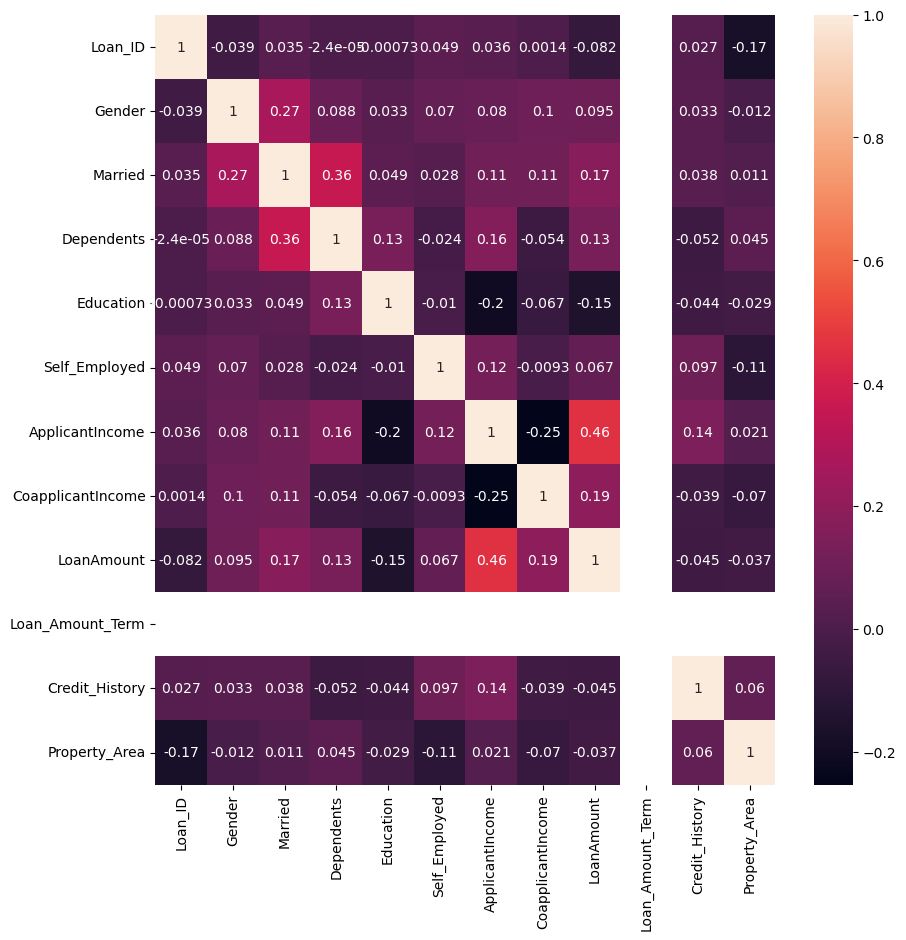

In [31]:
# Correlation of dataset

cormat=test_data.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(cormat,annot=True)

In [32]:
# Feature Extraction

x_test=test_data.drop(columns=['Loan_ID'])
x_test=x_test.values

In [33]:
# Feature Scaling

x_test=scaler.fit_transform(x_test)

# Data Cleaning is done for both train and test dataset. Now we will perform various Classification model

### Support Vector Machine (SVM)

In [34]:
from sklearn.svm import SVC
svc=SVC(kernel="linear")
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [35]:
y_pred=svc.predict(x_test)

# Prediction is done Successfully

In [36]:
# Load the sample data

sample = pd.read_csv(r"C:\Users\sravi\Downloads\ICTAK\Virtual competion 2\sample_submission_49d68Cx.csv")
sample.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [37]:
# Replacing Loan_Status as the y_pred of svm classification

df1=pd.DataFrame(y_pred,columns=["Loan_Status"])
df1=df1.replace(1,'Y')
df1=df1.replace(0,'N')
df1.head()

,Loan_Status
0,Y
1,Y
2,Y
3,Y
4,Y


In [38]:
sample=sample.drop(columns=['Loan_Status'],axis=1)
sample['Loan_Status']=df1['Loan_Status']
sample.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [39]:
# Converting the new dataset to csv

sample.to_csv("svc.csv",index=False)

### k-nearest neighbors (KNN) 

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10,metric="minkowski",p=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [41]:
y_pred1=knn.predict(x_test)

# Prediction is done Successfully

In [42]:
df2=pd.DataFrame(y_pred1,columns=["Loan_Status"])
df2=df2.replace(1,'Y')
df2=df2.replace(0,'N')
df2.head()

,Loan_Status
0,Y
1,Y
2,Y
3,Y
4,Y


In [43]:
sample=sample.drop(columns=['Loan_Status'],axis=1)
sample['Loan_Status']=df2['Loan_Status']
sample.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [44]:
sample.to_csv("knn.csv",index=False)

### Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [46]:
y_pred2 = dt.predict(x_test)

# Prediction is done Successfully

In [47]:
df3=pd.DataFrame(y_pred2,columns=["Loan_Status"])
df3=df3.replace(1,'Y')
df3=df3.replace(0,'N')
df3.head()

,Loan_Status
0,Y
1,Y
2,Y
3,N
4,N


In [48]:
sample=sample.drop(columns=['Loan_Status'],axis=1)
sample['Loan_Status']=df3['Loan_Status']
sample.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,N
4,LP001051,N


In [49]:
sample.to_csv("DecTree.csv",index=False)

### Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [51]:
y_pred3=rf_clf.predict(x_test)

# Prediction is done Successfully

In [52]:
df4=pd.DataFrame(y_pred2,columns=["Loan_Status"])
df4=df4.replace(1,'Y')
df4=df4.replace(0,'N')
df4.head()

,Loan_Status
0,Y
1,Y
2,Y
3,N
4,N


In [53]:
sample=sample.drop(columns=['Loan_Status'],axis=1)
sample['Loan_Status']=df4['Loan_Status']
sample.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,N
4,LP001051,N


In [54]:
sample.to_csv("RandomForest.csv",index=False)

### Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [56]:
y_pred4 = log_reg.predict(x_test)

# Prediction is done Successfully

In [57]:
df5=pd.DataFrame(y_pred2,columns=["Loan_Status"])
df5=df5.replace(1,'Y')
df5=df5.replace(0,'N')
df5.head()

,Loan_Status
0,Y
1,Y
2,Y
3,N
4,N


In [58]:
sample=sample.drop(columns=['Loan_Status'],axis=1)
sample['Loan_Status']=df5['Loan_Status']
sample.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,N
4,LP001051,N


In [59]:
sample.to_csv("logistic.csv",index=False)